# Cross validation

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import scipy.stats as stats
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import model_selection

Rozważmy następujący zbiór punktów:

In [3]:
f = lambda x: ((x*2-1)*(x**2-2)*(x-2)+3)
x = stats.uniform(0,3).rvs(100)
y = f(x) + stats.norm(0,1).rvs(len(x))
x=np.vstack(x)

# Zadanie 
Proszę wykonać regresję (Ridge Regression) na powyższym zbiorze danych dobierając optymalny parametr $\alpha$ 

1.0


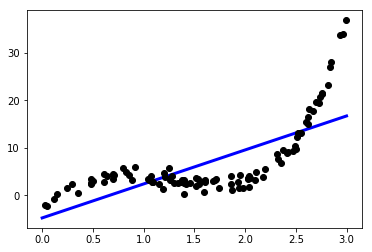

In [4]:
clf = linear_model.RidgeCV(alphas=[0.1, 1.0, 10.0]) 
clf.fit(x, y) 
print(clf.alpha_)
x_plot = np.vstack(np.linspace(0, 3, 100))
plt.plot(x_plot, clf.predict(x_plot), color='blue',linewidth=3)
plt.plot(x, y, 'ok');
plt.show()

# Zadanie 
Proszę wykonać regresję (Ridge Regression) oraz klasyczną regresję z różnymi stopniami wielomianów i optymalnym parametrem $\apha$: 

- regrsji linowej
- regrsji wielomianowej stopnia 2
- regrsji wielomianowej stopnia 3
- regrsji wielomianowej stopnia 4
- regrsji wielomianowej stopnia 5
- regrsji wielomianowej stopnia 25

In [5]:
# prepare models
models = []
predicts = []
names=[]
models.append(('LR', linear_model.LinearRegression()))
models.append(('Ridge LR', linear_model.RidgeCV(alphas=[0.1, 1.0, 10.0])))
models.append(('PR degree 2', make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression()) ))
models.append(('Ridge PR degree 2', make_pipeline(PolynomialFeatures(2), linear_model.RidgeCV(alphas=[0.1, 1.0, 10.0])) ))
models.append(('PR degree 3', make_pipeline(PolynomialFeatures(3), linear_model.LinearRegression()) ))
models.append(('Ridge PR degree 3', make_pipeline(PolynomialFeatures(3), linear_model.RidgeCV(alphas=[0.1, 1.0, 10.0])) ))
models.append(('PR degree 4', make_pipeline(PolynomialFeatures(4), linear_model.LinearRegression()) ))
models.append(('Ridge PR degree 4', make_pipeline(PolynomialFeatures(4), linear_model.Ridge(alpha=1.0)) ))
models.append(('PR degree 10', make_pipeline(PolynomialFeatures(10), linear_model.LinearRegression()) ))
models.append(('Ridge PR degree 10', make_pipeline(PolynomialFeatures(10), linear_model.RidgeCV(alphas=[0.1, 1.0, 10.0])) ))

In [6]:
x_plot = np.vstack(np.linspace(0, 3, 100))
for name, model in models:
    print(name)
    model.fit(x, y)
    predicts.append(model.predict(x_plot))
    names.append(name)

LR
Ridge LR
PR degree 2
Ridge PR degree 2
PR degree 3
Ridge PR degree 3
PR degree 4
Ridge PR degree 4
PR degree 10
Ridge PR degree 10


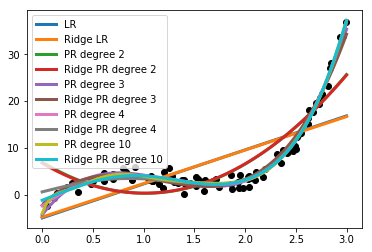

In [7]:
x_plot = np.vstack(np.linspace(0, 3, 100))
plt.plot(x, y, 'ok');
for i in range(len(models)):
    #print(i)
    plt.plot(x_plot, predicts[i],linewidth=3,label=names[i])
plt.legend()    
plt.show()



In [8]:
# evaluate each model in turn
results = []
names = []
scoring = 'neg_mean_absolute_error'
#scoring = 'r2'

In [9]:
seed = 7
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)



LR: -4.422518 (1.410954)
Ridge LR: -4.398595 (1.421718)
PR degree 2: -3.000620 (0.881047)
Ridge PR degree 2: -3.000172 (0.890356)
PR degree 3: -0.983731 (0.201380)
Ridge PR degree 3: -1.039463 (0.370531)
PR degree 4: -0.826951 (0.141157)
Ridge PR degree 4: -0.920530 (0.221460)
PR degree 10: -0.904259 (0.259451)
Ridge PR degree 10: -0.876595 (0.179223)


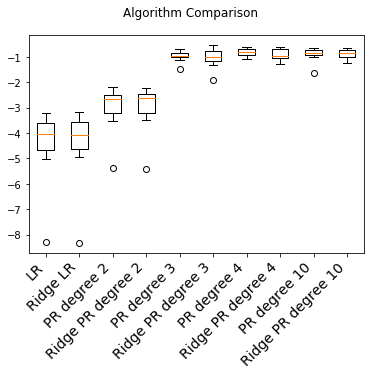

In [10]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=45, ha='right', fontsize=14)
plt.show()  

# Zdanie 
Dobierz optymalny stopień wielomianu za pomocą metody <tt>GridSearchCV</tt>. 

In [12]:
from sklearn.model_selection import GridSearchCV


grid = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), linear_model.Ridge()),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3, 4, 5, 6, 7], 
                                'ridge__alpha': [1., 2., 3., 4., 5., 6., 7.]},
                    cv=5,
                    refit=False)
#make_pipeline(PolynomialFeatures(degree=2), linear_model.Ridge()).get_params().keys()
grid.fit(x, y)
grid.best_params_

{'polynomialfeatures__degree': 7, 'ridge__alpha': 1.0}